<a href="https://colab.research.google.com/github/CR-Reyes/Fiscomp/blob/master/QuantumTunneling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

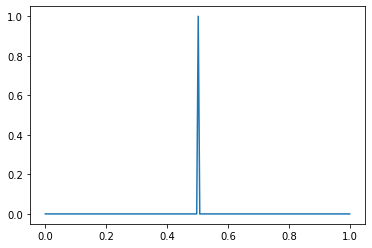

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

win = 1
n = 200
x = np.linspace(0, win, n)
V = np.zeros(n)
V[round(n/2)] = 1
plt.plot(x, V)
plt.show()

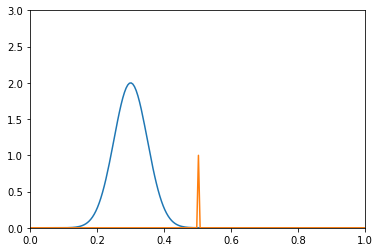

In [ ]:
def dy2d2x(n):
    matrix = np.zeros([n, n])
    diagonal = np.ones(n)
    matrix += np.diag(diagonal[1:], -1)
    matrix += np.diag(diagonal[1:], 1)
    matrix += np.diag(diagonal * 2, 0)
    return matrix

H = dy2d2x(n) + np.diag(V, 0)
gausspulse = np.exp(-200*(x-.3)**2) * 2

plt.plot(x, gausspulse)
plt.plot(x, V)
plt.axis([0, 1, 0, 3])
plt.show()

def psi(t):
    return np.abs(la.expm(-1j*H*t) @ np.exp(-200*(x-.2)**2) * 2)**2

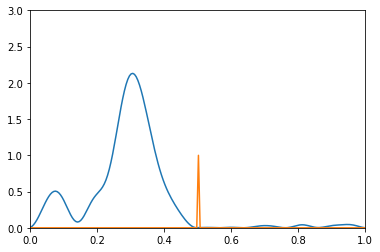

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot(x, psi(0))
ax.axis([0, 1, 0, 3])
ax.plot(x, V)

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,

def animate(i):
    line.set_ydata(psi(i/10))  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=int(1e4), init_func=init, interval=20, blit=True, save_count=50)

ani.save("movie.mp4")
plt.show()